<a href="https://colab.research.google.com/github/sharlynmuturi/Pytorch-Tutorial/blob/main/laptop_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving laptop_price.csv to laptop_price.csv


In [70]:
import pandas as pd

df = pd.read_csv("laptop_price.csv", encoding = 'latin-1')

# Data Exploration

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [72]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

laptop_ID: 1303 unique values
Company: 19 unique values
Product: 618 unique values
TypeName: 6 unique values
Inches: 18 unique values
ScreenResolution: 40 unique values
Cpu: 118 unique values
Ram: 9 unique values
Memory: 39 unique values
Gpu: 110 unique values
OpSys: 9 unique values
Weight: 179 unique values
Price_euros: 791 unique values


# Data Pre-processing

In [73]:
df = df.drop('Product', axis = 1)

## One-Hot Encoding and Feature Engineering

In [74]:

df = df.join(pd.get_dummies(df.Company).add_prefix('Company_'))
df = df.drop('Company', axis = 1)

df = df.join(pd.get_dummies(df.TypeName).add_prefix('TypeName_'))
df = df.drop('TypeName', axis = 1)

df = df.join(pd.get_dummies(df.OpSys).add_prefix('OpSys_'))
df = df.drop('OpSys', axis = 1)

In [75]:
df['Ram'] = df['Ram'].str[:-2].astype(int)

In [76]:
df['Weight'] = df['Weight'].str[:-2].astype('float')

In [77]:
df.ScreenResolution.str.split(' ').head()

,ScreenResolution
0,"[IPS, Panel, Retina, Display, 2560x1600]"
1,[1440x900]
2,"[Full, HD, 1920x1080]"
3,"[IPS, Panel, Retina, Display, 2880x1800]"
4,"[IPS, Panel, Retina, Display, 2560x1600]"


In [78]:
df['ScreenResolution'] = df.ScreenResolution.str.split(' ').apply(lambda x: x[-1])

df['Screen Width'] = df.ScreenResolution.str.split('x').apply(lambda x: x[0]).astype('int')
df['Screen Height'] = df.ScreenResolution.str.split('x').apply(lambda x: x[1]).astype('int')

df = df.drop('ScreenResolution', axis = 1)

In [79]:
df.Cpu.str.split(' ').head()

,Cpu
0,"[Intel, Core, i5, 2.3GHz]"
1,"[Intel, Core, i5, 1.8GHz]"
2,"[Intel, Core, i5, 7200U, 2.5GHz]"
3,"[Intel, Core, i7, 2.7GHz]"
4,"[Intel, Core, i5, 3.1GHz]"


In [80]:
df['CPU Brand'] = df.Cpu.str.split(' ').apply(lambda x: x[0])

df = df.join(pd.get_dummies(df['CPU Brand']).add_prefix('cpu_'))
df = df.drop('CPU Brand', axis = 1)

df['CPU Frequency'] = df.Cpu.str.split(' ').apply(lambda x: x[-1]).str[:-3].astype('float')

df = df.drop('Cpu', axis = 1)

In [81]:
df.Memory.str.split(' ').head()

,Memory
0,"[128GB, SSD]"
1,"[128GB, Flash, Storage]"
2,"[256GB, SSD]"
3,"[512GB, SSD]"
4,"[256GB, SSD]"


In [82]:
df['Memory Amount'] = df.Memory.str.split(' ').apply(lambda x: x[0])
df['Memory Amount'] = df['Memory Amount'].apply(lambda x: float(x[:-2]) * (1000 if 'GB' in x else 1000 * 1000))

df['Memory Type'] = df.Memory.str.split(' ').apply(lambda x: x[1])
df = df.join(pd.get_dummies(df['Memory Type']).add_prefix('MemoryType_'))
df = df.drop('Memory Type', axis = 1)

df = df.drop('Memory', axis = 1)

In [83]:
df.Gpu.str.split(' ').head()

,Gpu
0,"[Intel, Iris, Plus, Graphics, 640]"
1,"[Intel, HD, Graphics, 6000]"
2,"[Intel, HD, Graphics, 620]"
3,"[AMD, Radeon, Pro, 455]"
4,"[Intel, Iris, Plus, Graphics, 650]"


In [84]:
df['GPU Brand'] = df.Gpu.str.split(' ').apply(lambda x: x[0])

df = df.join(pd.get_dummies(df['GPU Brand']).add_prefix('gpu_'))
df = df.drop('GPU Brand', axis = 1)

df = df.drop('Gpu', axis = 1)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_ID                    1303 non-null   int64  
 1   Inches                       1303 non-null   float64
 2   Ram                          1303 non-null   int64  
 3   Weight                       1303 non-null   float64
 4   Price_euros                  1303 non-null   float64
 5   Company_Acer                 1303 non-null   bool   
 6   Company_Apple                1303 non-null   bool   
 7   Company_Asus                 1303 non-null   bool   
 8   Company_Chuwi                1303 non-null   bool   
 9   Company_Dell                 1303 non-null   bool   
 10  Company_Fujitsu              1303 non-null   bool   
 11  Company_Google               1303 non-null   bool   
 12  Company_HP                   1303 non-null   bool   
 13  Company_Huawei    

array([[<Axes: title={'center': 'laptop_ID'}>,
        <Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price_euros'}>,
        <Axes: title={'center': 'Screen Width'}>],
       [<Axes: title={'center': 'Screen Height'}>,
        <Axes: title={'center': 'CPU Frequency'}>,
        <Axes: title={'center': 'Memory Amount'}>]], dtype=object)

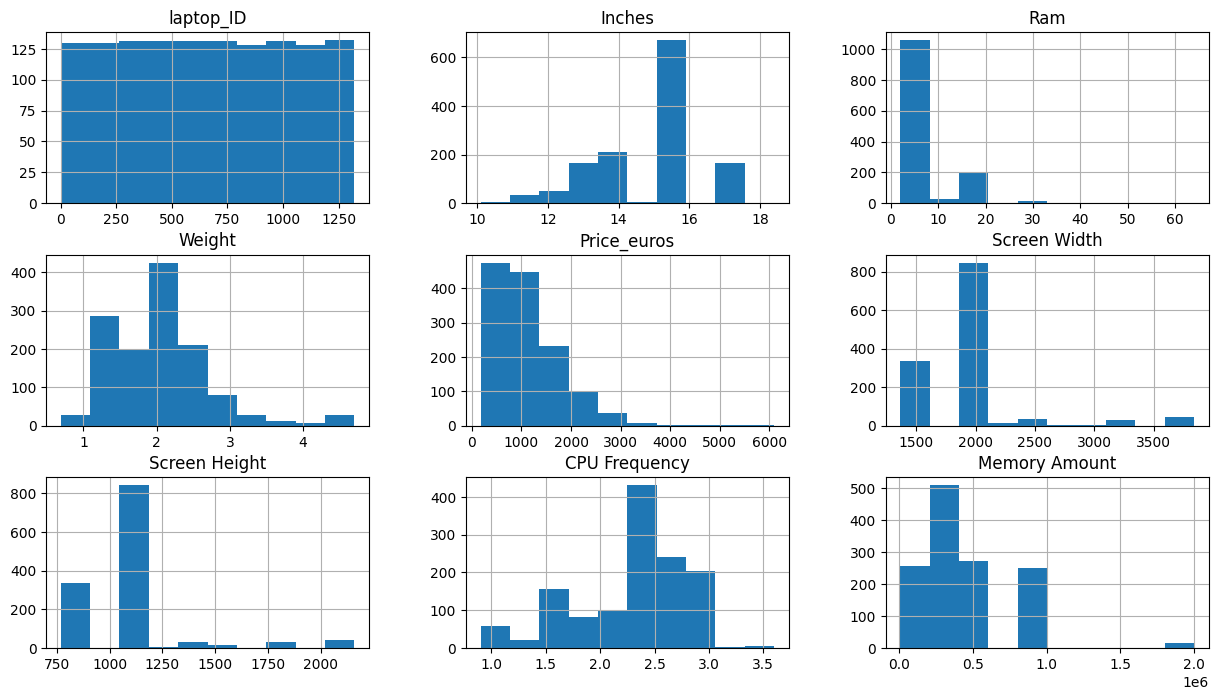

In [86]:
df.hist(figsize=(15, 8))

In [87]:
target_corr = df.corr()['Price_euros'].apply(abs).sort_values()
selected_features = target_corr[-21:].index
limited_df = df[selected_features]

selected_features

Index(['Company_MSI', 'cpu_AMD', 'cpu_Intel', 'gpu_Intel', 'gpu_AMD',
       'Company_Acer', 'Weight', 'MemoryType_Flash', 'Company_Razer',
       'TypeName_Workstation', 'TypeName_Ultrabook', 'gpu_Nvidia',
       'TypeName_Gaming', 'MemoryType_HDD', 'CPU Frequency', 'MemoryType_SSD',
       'TypeName_Notebook', 'Screen Height', 'Screen Width', 'Ram',
       'Price_euros'],
      dtype='object')

<Axes: >

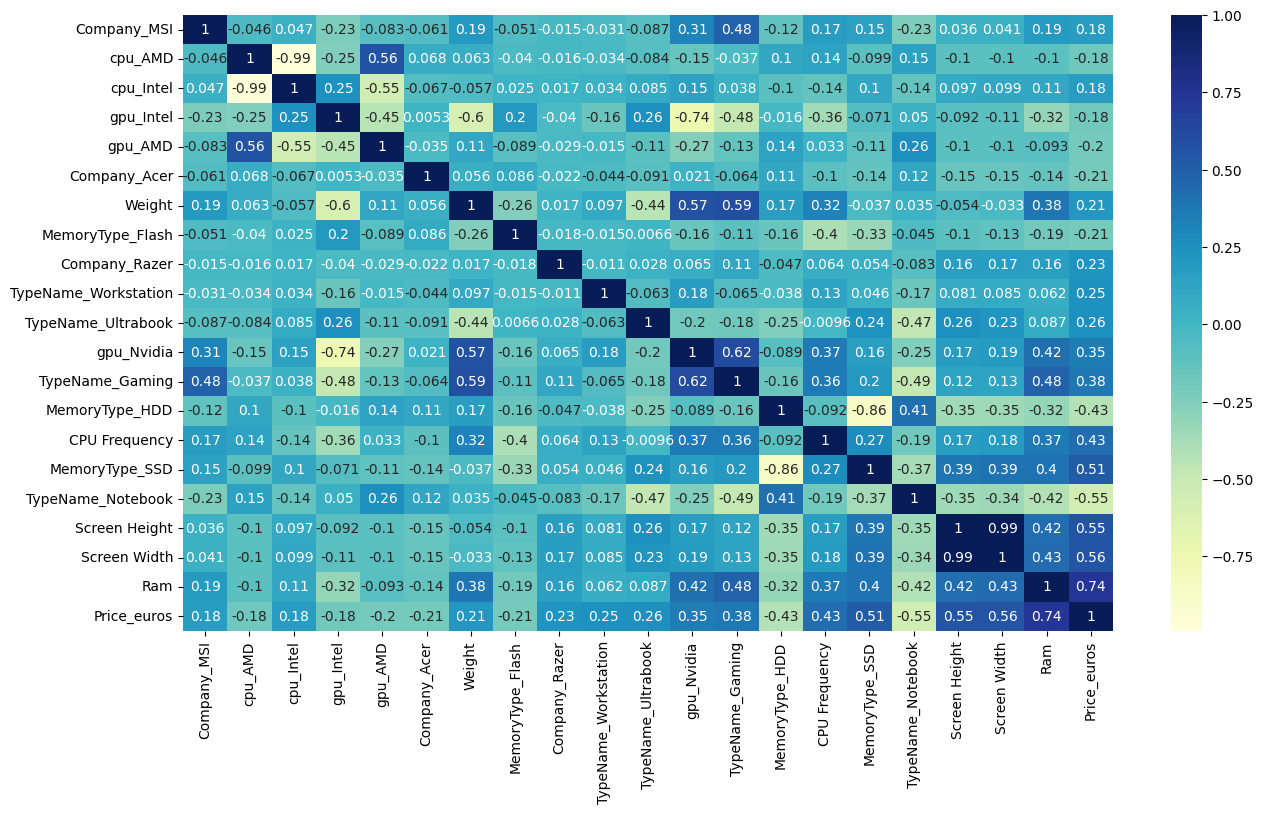

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.heatmap(limited_df.corr(), annot=True, cmap='YlGnBu')

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop('Price_euros', axis =1), limited_df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

forest.score(X_test_scaled, y_test)

0.8262870881866443

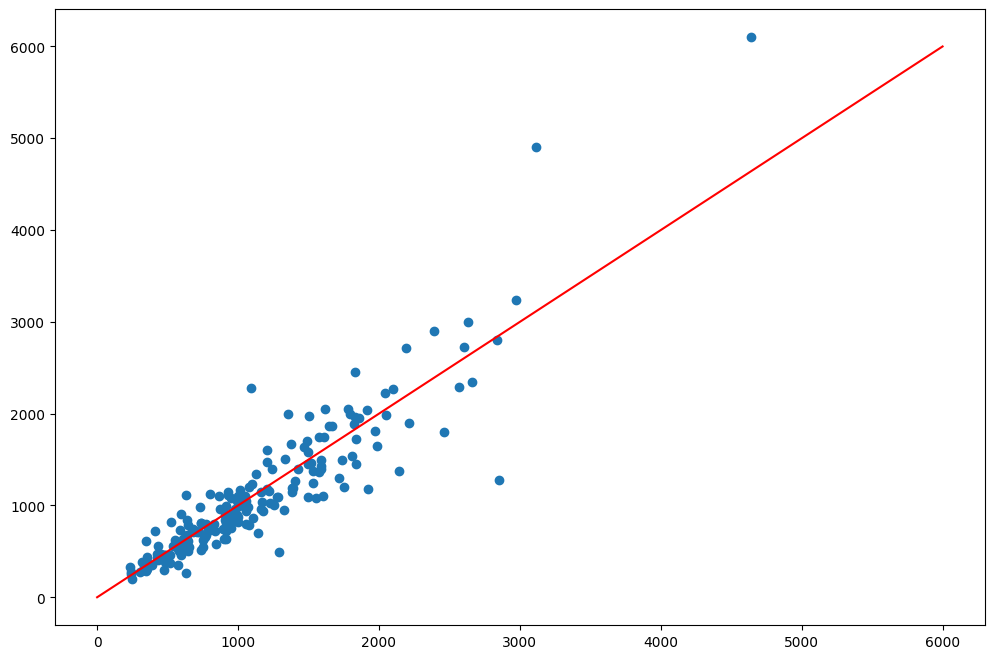

In [90]:
y_pred = forest.predict(X_test_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c='red')

In [91]:
X_new_scaled = scaler.transform([X_test.iloc[10]])
forest.predict(X_new_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2213.25247])

In [92]:
y_test.iloc[10]

np.float64(1899.0)